In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.io as sio
np.random.seed(7)

In [5]:
Data=sio.loadmat('/content/drive/MyDrive/datasets/PaviaU (1).mat')['paviaU']
Label=sio.loadmat('/content/drive/MyDrive/datasets/PaviaU_gt (12).mat')['paviaU_gt']
Data=np.reshape(Data,(Data.shape[0]*Data.shape[1],Data.shape[2]))

Label=np.reshape(Label,(Label.shape[0]*Label.shape[1]))

Labels,counts=np.unique(Label,return_counts=True)

Data=Data[Label>0,:]
Label=Label[Label>0]

Labels,counts=np.unique(Label,return_counts=True)


Labels,counts=np.unique(Label,return_counts=True)

In [6]:
from sklearn.model_selection import train_test_split

testRatio=0.20

X_train, X_test, y_train, y_test = train_test_split(Data, Label, test_size=testRatio, random_state=345,
                                                        stratify=Label)

In [7]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Data)
Data= scaler.transform(Data)
X_train= scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [8]:

lda=LDA()
X_train=lda.fit_transform(X_train,y_train)
X_test=lda.transform(X_test)




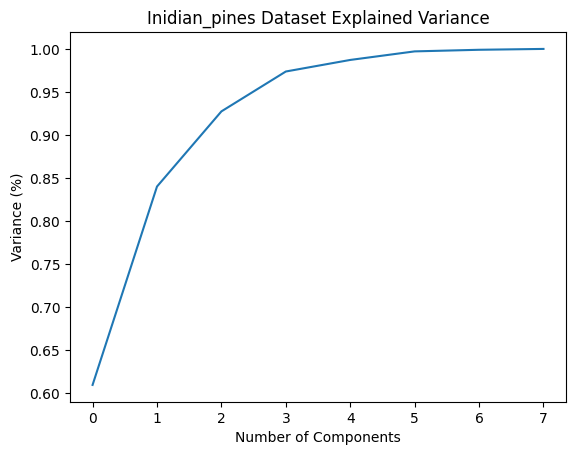

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(lda.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Inidian_pines Dataset Explained Variance')
plt.show()


In [10]:
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

classifiers = []
Train_acc = []
Valid_acc = []
accuracy = -1
accuracy_train = -1

# Adjusted range for C and gamma
for C in np.arange(1, 102, 50):  # Increased step size for C
    for gamma in np.arange(0.001, 0.1, 0.02):  # Increased step size for gamma

        clf = SVC(C=C, gamma=gamma)
        print("----------------------------------------------------------------")
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))
        y_pred = clf.predict(X_train)
        acc_train = metrics.accuracy_score(y_train, y_pred)
        Train_acc.append(acc_train)
        y_pred = clf.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        Valid_acc.append(acc)

        if acc_train > accuracy_train:
            accuracy_train = acc_train
            best_c_train = C
            best_g_train = gamma
        print(f"C_train= {C} Best C_train = {best_c_train} gamma_train = {gamma} best_gamma_train = {best_g_train} Accuracy_train = {acc_train} Best Accuracy_train = {accuracy_train}\n")

        if acc > accuracy:
            accuracy = acc
            best_c = C
            best_g = gamma
        print(f"C= {C} Best C = {best_c} gamma = {gamma} best_gamma = {best_g} Accuracy = {acc} Best Accuracy = {accuracy}\n")


----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.001 best_gamma_train = 0.001 Accuracy_train = 0.8871420222092343 Best Accuracy_train = 0.8871420222092343

C= 1 Best C = 1 gamma = 0.001 best_gamma = 0.001 Accuracy = 0.8809022907900889 Best Accuracy = 0.8809022907900889

----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.021 best_gamma_train = 0.021 Accuracy_train = 0.9226475745178259 Best Accuracy_train = 0.9226475745178259

C= 1 Best C = 1 gamma = 0.021 best_gamma = 0.021 Accuracy = 0.9153810191678354 Best Accuracy = 0.9153810191678354

----------------------------------------------------------------
C_train= 1 Best C_train = 1 gamma_train = 0.041 best_gamma_train = 0.041 Accuracy_train = 0.9286090005844535 Best Accuracy_train = 0.9286090005844535

C= 1 Best C = 1 gamma = 0.041 best_gamma = 0.041 Accuracy = 0.9226273959794297 Best Accuracy = 0.9226273959794297

-------

In [11]:
import pandas as pd
clf = SVC(C=51,gamma=0.006,decision_function_shape='ovo')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy :",metrics.accuracy_score(y_pred, y_test)*100)
from sklearn.metrics import cohen_kappa_score
print("Cohen Kappa Score :",cohen_kappa_score(y_pred, y_test)*100)
from sklearn.metrics import confusion_matrix,classification_report
mat = confusion_matrix(y_pred, y_test)
pd.DataFrame(mat)
# print(confusion_matrix(y_test, y_pred ))
print(classification_report(y_test, y_pred ))


Accuracy : 91.90042075736325
Cohen Kappa Score : 89.19689647640709
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1326
           2       0.94      0.97      0.95      3730
           3       0.85      0.67      0.75       420
           4       0.96      0.93      0.94       613
           5       1.00      1.00      1.00       269
           6       0.88      0.80      0.84      1006
           7       0.91      0.83      0.87       266
           8       0.80      0.90      0.84       737
           9       1.00      1.00      1.00       189

    accuracy                           0.92      8556
   macro avg       0.92      0.89      0.90      8556
weighted avg       0.92      0.92      0.92      8556



In [12]:
print(pd.DataFrame(mat))

      0     1    2    3    4    5    6    7    8
0  1260     0    6    1    0   12   43   27    0
1     0  3609    2   43    0  181    0    6    0
2     9     0  281    0    0    1    0   38    0
3     1    23    0  569    0    1    0    0    0
4     0     0    0    0  269    0    0    0    0
5     4    97    2    0    0  804    0    5    0
6    20     0    0    0    0    0  222    1    0
7    32     1  129    0    0    7    1  660    0
8     0     0    0    0    0    0    0    0  189
